<a href="https://colab.research.google.com/github/Celestine10/Celestine-Azonobi/blob/master/Basic_Classification%20of_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U tensorflow_datasets

     |████████████████████████████████| 3.3MB 4.7MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [2]:
from __future__ import absolute_import,division,print_function
import tensorflow as tf
import tensorflow_datasets as tfds
#tf.logging.set_verbosity(tf.logging.ERROR)

#Helper Libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

#Improve progress bar display
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm
print(tf.__version__)
#tf.enable_eager_execution()

2.2.0


In [0]:
train_data = Path("/content/sample_data/mnist_train_small.csv")
test_data = Path("/content/sample_data/mnist_test.csv")

In [4]:
dataset, metadata = tfds.load("fashion_mnist", as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset["train"], dataset["test"]

/root/tensorflow_datasets/fashion_mnist/3.0.0
Using /root/tensorflow_datasets/fashion_mnist/3.0.1 instead.


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteSO79TC/fashion_mnist-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteSO79TC/fashion_mnist-test.tfrecord


Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [0]:
headers = ["T=Shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
num_train_examples = metadata.splits["train"].num_examples
num_test_examples = metadata.splits["test"].num_examples
print("Number of Training Examples:{}:".format(num_train_examples))
print("Number of Test Examples:{}:".format(num_test_examples))

Number of Training Examples:60000:
Number of Test Examples:10000:


## Preprocessing the data

In [0]:
#Normalisation Function

def normalize(images, labels):
  images = tf.cast(images, tf.float32)
  images /= 255
  return images, labels

#The map function applies the normalize function to each element in the train and test datasets
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


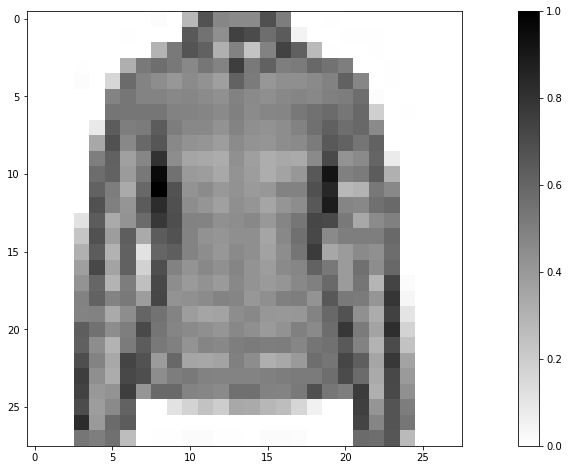

In [8]:
#Exploration
#Let's plot an image to see what it looks like
#Take a single image and remove the color dimension by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))


#Plot the image

plt.figure(figsize=(20,8))
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

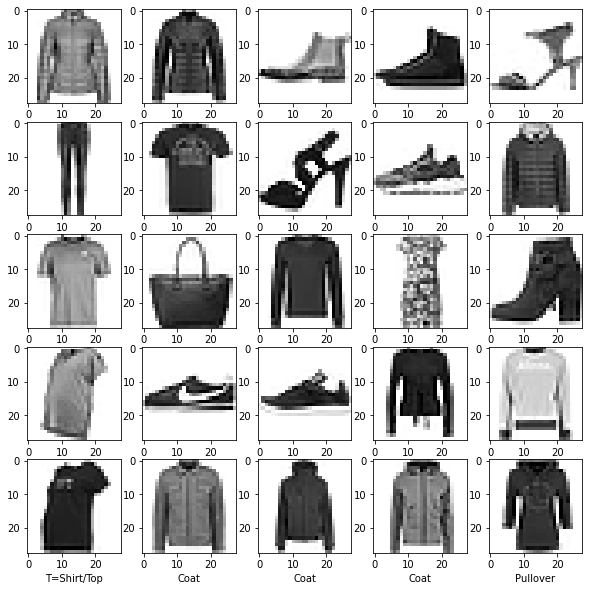

In [9]:
plt.figure(figsize=(10,10))
i = 0
for image, label in test_dataset.take(25):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks = ([])
    plt.yticks = ([])
    plt.imshow(image, cmap = plt.cm.binary)
    plt.grid(False)
    plt.xlabel(headers[label])
    i +=1
plt.show()


## **Building the model**
Building a neural network model requires configuring the the layers of the model, then compiling the model.

In [0]:
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(28, activation=tf.nn.relu),
                            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
                             ])

In [0]:
model.compile(optimizer="adam",
              loss = 'sparse_categorical_crossentropy',
              metrics=["accuracy"])

In [0]:
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

In [13]:
model.fit(train_dataset, epochs=5,steps_per_epoch=math.ceil(num_test_examples/32))


Epoch 1/5
313/313 [==============================] - 1s 3ms/step - loss: 0.8518 - accuracy: 0.7138
Epoch 2/5
313/313 [==============================] - 1s 3ms/step - loss: 0.5633 - accuracy: 0.8057
Epoch 3/5
313/313 [==============================] - 1s 3ms/step - loss: 0.5133 - accuracy: 0.8196
Epoch 4/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4641 - accuracy: 0.8411
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.4593 - accuracy: 0.8373


## Evaluate Accuracy

In [14]:
test_loss, test_accuracy = model.evaluate(test_dataset,steps = math.ceil(num_test_examples/32) )
print("Accuracy on test dataset:", test_accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 0.4820 - accuracy: 0.8310
Accuracy on test dataset: 0.8309999704360962


## Making Predictions

In [0]:
for test_images, test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  predictions = model.predict(test_images)

In [16]:
predictions.shape

(32, 10)

In [17]:
predictions[0]

array([4.4339657e-04, 8.0322899e-04, 2.0603916e-02, 6.3511899e-05,
       9.1431683e-01, 1.6896971e-07, 6.3345708e-02, 8.9621537e-08,
       4.2314039e-04, 6.5716755e-08], dtype=float32)

In [18]:
np.argmax(predictions[0])

4

In [19]:
test_labels[0]

4